In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [45]:
import networkx as nx

In [7]:
from os.path import join

In [10]:
df = pd.read_csv("data/crime_inegi_localidades.csv")

In [11]:
df.head()

,year,date,lat,lon,news,cassualties,url,neighborhood,x,y,cve_mun,nom_mun,cve_loc,nom_loc
0,2015,2015-10-12,25.617672,-100.259318,Persiguen y ejecutan a hombre,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,EJIDAL LOS REMATES,2.673990e+06,1.508739e+06,39.0,Monterrey,1.0,Monterrey
1,2015,2015-10-02,25.632075,-100.286088,Ejecutan a uno en plaza en Garza Sada,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,REVOLUCION PROLETARIA,2.671295e+06,1.510295e+06,39.0,Monterrey,1.0,Monterrey
2,2015,2015-10-01,25.675784,-100.475788,Lo ejecutan frente a su casa,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,HDA SANTA CATARINA (FOMERREY 29),2.652286e+06,1.514900e+06,48.0,Santa Catarina,1.0,Ciudad Santa Catarina
3,2015,2015-09-24,25.657586,-100.322029,Lo esperan para ejecutarlo,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,INDEPENDENCIA,2.667671e+06,1.513065e+06,39.0,Monterrey,1.0,Monterrey
4,2015,2015-09-24,25.683207,-100.305650,Matan a 2 clientes en ataque 13 a bar,2.0,http://www.elnorte.com/aplicaciones/articulo/d...,CENTRO DE MONTERREY,2.669274e+06,1.515909e+06,39.0,Monterrey,1.0,Monterrey


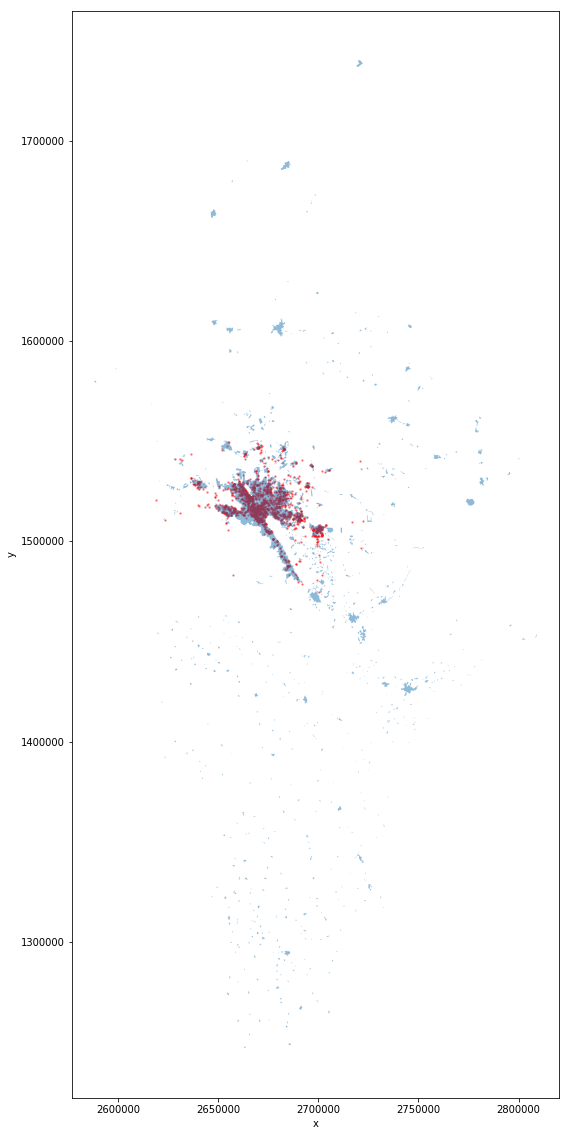

In [27]:
PATH = "/home/diana/Workspace/PhD/chuchocentro/data/inegi_NL_2016/conjunto_de_datos"

fp = join(PATH, '19l.shp')

map_df = gpd.read_file(fp, encoding='latin')
fig, ax = plt.subplots(figsize=(20, 20))
scatter = df.plot.scatter(x='x', y='y', ax=ax, alpha=0.4, c='Red', s = 2)

map_df.plot(ax=ax, alpha=0.5)

In [28]:
map_df.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOMLOC,TIPO,CONDICION,geometry
0,19,036,0021,San José de Cuatro Caminos,R,H,"POLYGON ((2674842.031 1275677.945, 2674833.201..."
1,19,045,0031,Gomas y Mendiola (Rancho de Gomas),R,H,"MULTIPOLYGON (((2652755.695 1569226.779, 26527..."
2,19,004,0050,Atongo de Abajo (Atongo Allende),R,H,"POLYGON ((2700171.740 1480047.670, 2700218.002..."
3,19,036,0007,El Gallito,R,H,"POLYGON ((2699803.674 1270568.599, 2699841.960..."
4,19,004,0025,El Venado,R,H,"POLYGON ((2702660.694 1477648.391, 2702652.641..."


In [36]:
vecinos = []

for index, localidad in map_df.iterrows():   
    # get 'not disjoint' countries
    neighbors = map_df[~map_df.geometry.disjoint(localidad.geometry)].NOMLOC.tolist()
    # remove own name from the list
    vecinos = vecinos + [(localidad.NOMLOC, name) 
                 for name in neighbors if localidad.NOMLOC != name ]

In [38]:
vecinos

[('Atongo de Abajo (Atongo Allende)', 'Atongo de Abajo'),
 ('Bosques de San Pedro', 'Jardines de la Silla (Jardines)'),
 ('Jardines de la Silla (Jardines)', 'Bosques de San Pedro'),
 ('Jardines de la Silla (Jardines)', 'Montebello'),
 ('Jardines de la Silla (Jardines)', 'Ciudad Benito Juárez'),
 ('Jardines de la Silla (Jardines)', 'Valle de Juárez'),
 ('Jardines de la Silla (Jardines)', 'Monte Kristal'),
 ('Jardines de la Silla (Jardines)', 'La Maestranza'),
 ('Jardines de la Silla (Jardines)', 'Guadalupe'),
 ('San José', 'Ismael Flores'),
 ('San José', 'Valle de Lincoln'),
 ('Cantera Chica (Cantera los Sauces)', 'La Almira'),
 ('Loma Prieta', 'Ciudad de Allende'),
 ('Las Brisas', 'La Corona [Hacienda]'),
 ('Prados de Santa Rosa', 'Ex-Hacienda Santa Rosa'),
 ('Fraccionamiento Misión de San Javier', 'Ciudad Apodaca'),
 ('Villas del Arco', 'Simeprodeso (Colectivo Nuevo)'),
 ('Simeprodeso (Colectivo Nuevo)', 'Villas del Arco'),
 ('Simeprodeso (Colectivo Nuevo)', 'Ciudad General Escobedo')

In [43]:
vecinos =  pd.DataFrame(vecinos, columns = ["source", "target"])

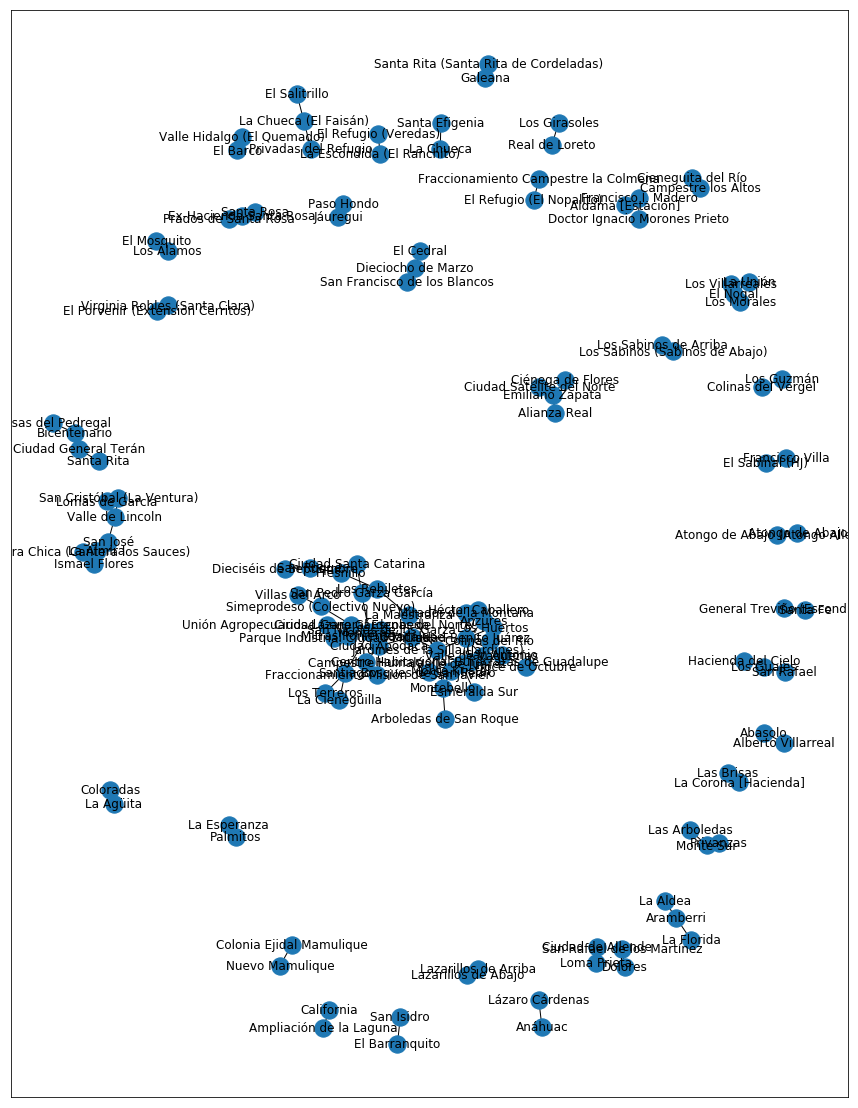

In [51]:
G = nx.from_pandas_edgelist(vecinos)
fig, ax = plt.subplots(1, 1, figsize=(15, 20));
nx.draw_networkx(G, ax=ax)

In [52]:
vecinos.to_csv("data/localidades_vecinas.csv", index=False)